# アルゴリズム 7.1

In [ ]:
! pip install POT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot

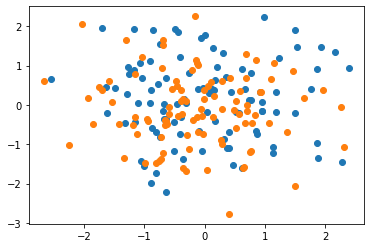

In [2]:
# データ生成
np.random.seed(0)
n = 100
x = np.random.randn(n, 2)
y = np.random.randn(n, 2)
a = np.ones(n) / n
b = np.ones(n) / n
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(y[:, 0], y[:, 1])

In [3]:
# 通常の最適輸送（外れ値に鋭敏）
for p in [0, 1, 10]:
    x[0, 0] = p # 外れ値
    C = ((x.reshape(-1, 1, 2) - y.reshape(1, -1, 2)) ** 2).sum(2)
    P = ot.emd(a, b, C)
    W = (C * P).sum()
    print(p, W)

0 0.22545794341828113
1 0.22701966725048606
10 0.8318351456244244


In [4]:
# 不均衡最適輸送（外れ値に頑健）
for p in [0, 1, 10]:
    x[0, 0] = p # 外れ値
    C = ((x.reshape(-1, 1, 2) - y.reshape(1, -1, 2)) ** 2).sum(2)

    # アルゴリズム 7.1
    eps = 0.1
    lam = 1
    K = np.exp(- C / eps) # ギブスカーネルの計算

    v = np.ones(n) # すべて 1 で初期化
    for i in range(100):
        u = np.maximum(np.exp(-lam/eps) * (K @ v), np.minimum(a, np.exp(lam/eps) * (K @ v))) / (K @ v)
        v = np.maximum(np.exp(-lam/eps) * (K.T @ u), np.minimum(a, np.exp(lam/eps) * (K.T @ u))) / (K.T @ u)

    P = u.reshape(n, 1) * K * v.reshape(1, n) # 主解
    W = (C * P).sum() + lam * np.abs(P.sum(1) - a).sum() + lam * np.abs(P.sum(0) - b).sum()
    print(p, W)


0 0.26815043097940594
1 0.2693680277800869
10 0.27817950004349623
